<a href="https://colab.research.google.com/github/toviga2000/Procesado-de-se-ales/blob/main/Practica1_V%C3%ADllora_Garc%C3%ADa_Antonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Computational Statistics (part I)


# Index

###1 Estimation
* 1.1 Kernel density estimation
* 1.2 Sample mean
* 1.3 Variance
* 1.4 Standard scores
* 1.5 Covariance 
* 1.6 Pearson's correlation
* 1.7 Spearman's rank correlation
 

## 1 Estimation

### 1.1 Kernel density estimates 

In some instances, we may not be interested in the parameters of a particular distribution of data, but on just a **continous representation** of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

Several uses are defined:

- Visualization - to explore the data by visualizing them and decide whether an estimated PDF is an appropriate model for the distribution.

- Interpolation - if we have reasons to beleive that the distribution is smooth, we can apply the KDE to interpolate the density specially for values that were not sampled.

- Simulation - specially when the sample distribution is small, it would be convenient to smooth the sample distribution by KDE in order to simulate and explore more possible outcomes, rather than replicating the observed data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution and adjust a KDE:

In [ ]:
# Create a bimodal distribution with a mixture of Normals.
from scipy.stats import norm

x1 = norm.rvs(size=100,loc=0,scale=3) # parameters (size=None,loc=mean,scale=stdev)
x2 = norm.rvs(size=50,loc=8,scale=1)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.



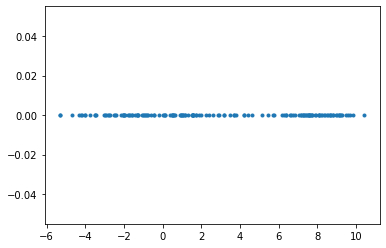

In [ ]:
plt.plot(x,np.zeros((x.shape[0],)),'.')

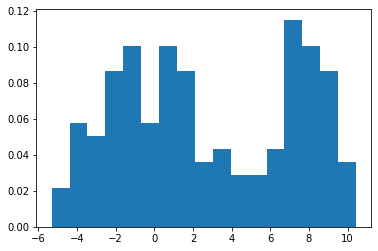

In [ ]:
#The simplest non-parametric technique for density estimation is the histogram.
plt.hist(x, bins=17, density=True)
plt.show()

The histogram above is discontinuous. To compute a continuous probability density function, we can use a KDE.

**How?** A normal kernel is placed on each of the data points xi and the kernels are then summed to make the kernel density estimate. 

<code>SciPy</code> implements a Gaussian KDE that automatically chooses an appropriate bandwidth following Scott's rule:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#ra3a8695506c7-3

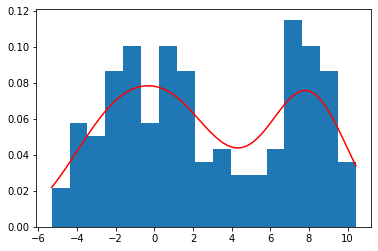

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=17, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

Kernel bandwidth selection strongly influences the estimate obtained from the KDE (much more so than the actual shape of the kernel). The bandwidth acts as a smoothing parameter, controlling the tradeoff between bias and variance in the result: a large bandwidth leads to a very smooth (i.e. high-bias) density distribution, while a small bandwidth leads to an unsmooth (i.e. high-variance) density distribution.

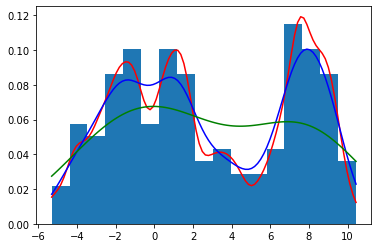

In [ ]:
# EXERCICE: Plot the estimation for  3 different bandwidths [0.1, 0.2, 0.6]
density = kde.gaussian_kde(x, bw_method=0.1)
density2 = kde.gaussian_kde(x, bw_method=0.2)
density3 = kde.gaussian_kde(x, bw_method=0.6)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=17, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.plot(xgrid, density2(xgrid), 'b-')
plt.plot(xgrid, density3(xgrid), 'g-')
plt.show()

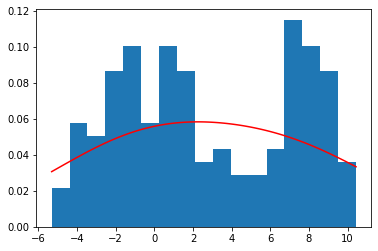

In [ ]:
density = kde.gaussian_kde(x, bw_method=1)

xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=17, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()


### 1.2 Mean




Let's think of a sequence of values: 
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138].

Can you guess which is the distribution? For example what would be its mean?

Hint: assume that it is normal distribution.

In [ ]:
# EXERCICE: What is the mean?
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])

x_m = np.mean(x)

print(x_m)

0.15516666666666667


Since we usually do not know the true population properties, we can try our best to define estimators of those properties from the sample set using a similar construction.

> **Estimation** is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population. 

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

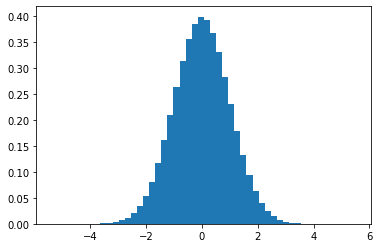

In [ ]:
x = np.random.normal(0.0, 1.0, 10000000)
a = plt.hist(x,50,density='True')

We can use our definition of empirical mean:

In [ ]:
print('The empirical mean of the sample is ', x.mean())

The empirical mean of the sample is  -0.0004333175773094153


Let us imagine that we were reported the following data, where probably one of the data (the last item) is wrong:
    

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -213.8])
print(x.mean())

-35.121833333333335


Is the mean estimator good enough? The median is also an estimator (more robust to outliers)

In [ ]:
# EXERCICE: Plot the median of the data
np.median(x)

-0.271

**Sample mean**

"Is median better than sample mean?" it depends, we can use two different objectives to answer this question: the *minimization of error* or the *maximization to get the right answer*. 
   * The median may be a better indicator of the most typical value if a set of scores has an outlier. 
   * If there are no outliers, we can use the **sample mean** to minimize **mean squared error** (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$$ MSE = \frac{1}{m} \sum(\hat{\mu} - \mu)^2$$




In [ ]:
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/NTests) 

MSE:  0.01080215848594492


In [ ]:
# EXERCICE: Test the MSE for different number of tests (NTests) and number of samples (NPoints) 
err = 0.0
mu=0.0
NTests=100000
var=1.0
NPoints=10000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/NTests) 

MSE:  9.978158535918194e-05


In [ ]:
# EXERCICE: Compare the median vs the mean

In [ ]:
print(np.mean(x))
print(np.median(x))

0.004519605828489551
0.005176248989150924


### 1.3 Sample variance

We can also estimate the variance with:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

This estimator works for large samples, but it is biased for small samples. We can  use $n − 1$ instead of $n$ in the formula to correct for this bias:

$$ \hat{\sigma}^2_{n-1} = \frac{1}{n-1} \sum_i (x_i - \mu)^2 $$


In [ ]:
# EXERCICE: compute the sample variance for the exercice above (i.e. 100000 points 1000 times)
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
np.var(x)

0.9989744248843108

### 1.4 Other concepts: Standard scores

A standard score or **Z-score** is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. It is computed as: 

$$ z_i = \frac{x_i - \mu}{\sigma}$$

This measure is dimensionless and its distribution has mean 0 and variance 1.

It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

<ipython-input-22-38ec263a0376>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  NB = np.int(np.round(np.sqrt(len(x))))
<ipython-input-22-38ec263a0376>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

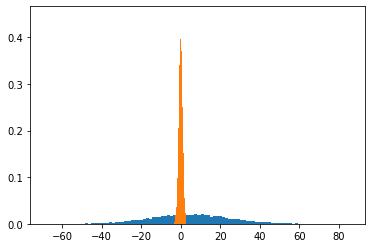

In [ ]:
# EXERCICE: Standardize the following data and plot the histogram of the original and the standardized data 
x = np.random.normal(5, 20, 10000)
x_stand = (x-np.mean(x))/np.std(x)

NB = np.int(np.round(np.sqrt(len(x))))
a =  plt.hist(x,NB, density='True')

NB = np.int(np.round(np.sqrt(len(x))))
a =  plt.hist(x_stand,NB, density='True')

### 1.5 Covariance 

Sometimes it would be of interest to measure the relationship between two variables. 

**Covariance** is a measure of the tendency of two variables to vary together. If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, their covariance is the expected value (or mean) of the product of their deviations from their individual expected values:

$$ Cov(X,Y) = \frac{1}{n} \sum (x_i - \mu_X)*(y_i - \mu_Y), $$

where $n$ is the length of the two series.

The *sign of the covariance therefore shows the tendency in the linear relationship between the variables*. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

In [ ]:
# Así me hago una funcion en Python
def Cov(X, Y): # Nombre_funcion(variables entrada):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/(len(X)) # aqui se define lo que devuelve la funcion

###########################

X = [5, -1, 3.3, 2.7, 12.2]
Y = [10,12,8,9,11]

print("Cov(X, X) = %.2f" % Cov(X, X))
print("Var(X) = %.2f" % np.var(X))

print( "Cov(X, Y) = %.2f" % Cov(X, Y))
print( "Cov(X, Y) = %.2f" % np.cov(X, Y)[0][1])


Cov(X, X) = 18.89
Var(X) = 18.89
Cov(X, Y) = 0.18
Cov(X, Y) = 0.22


In [ ]:
np.cov(X, Y)

array([[23.613,  0.225],
       [ 0.225,  2.5  ]])

### 1.6 Pearson's Correlation

Pearson's correlation coefficient $\rho$ is a measure of the strength of the linear association between two variables. It also takes into account the standard deviation $\sigma$ to measure the relationship among variables:
 
$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Or we can rewrite $\rho$ by factoring out $\sigma_X$ and $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


In [ ]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 1.00000
Corr(X, Y) = 0.65058


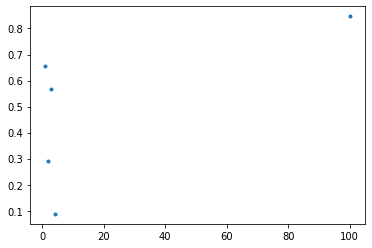

In [ ]:
plt.plot(X,Y,'.')

When $\rho = 0$, we cannot say that there is no relationship between the variables!

Pearson's coefficient only measures **linear** correlations!

### 1.7 Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of **outliers**. Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. 

* To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements. Then, we compute the Pearson’s correlation, **but for the ranks**.

* Spearman's correlation coefficient, $\rho_s$ measures the strength and direction of association between two ranked variables. While Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

In [ ]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    return Corr(list2rank(X), list2rank(Y))

X = [1, 2, 3, 4, 100]
Y = [5, -100, 7, 10, 9]

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))



ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.27
Spearman rank coefficient: 0.80


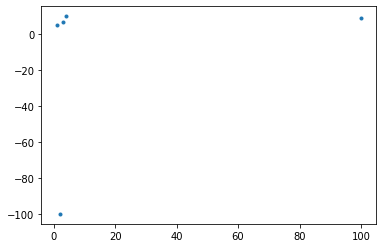

In [ ]:
plt.plot(X,Y,'.')

Anscombe’s quartet consists of four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x, y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

(Source: https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [ ]:
# EXERCISE: Load the Anscombe's quartet (file anscombe.csv from the files directory) and obtain the covariance, 
# Pearson's correlation and Spearman's rank correlation from each pair

In [ ]:
#My solution here
import pandas as pd
da = pd.read_csv('anscombe.csv')  
da.head()


,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


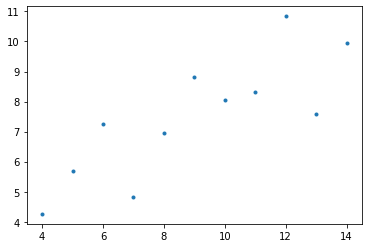

In [ ]:
# extraigo los valores de x1 y y1, y los ploteo
x1 = da['x1'].values
y1 = da['y1'].values

plt.plot(x1,y1,'.')

In [ ]:
print("Pearson rank coefficient: %.2f" % Corr(x1, y1))
print("Spearman rank coefficient: %.2f" % spearmanRank(x1, y1))

Pearson rank coefficient: 0.82
Spearman rank coefficient: 0.82


Here we implemented the correlation metrics by hand, but note these metrics are also implemented in python <code>scipy.stats.pearsonr</code> and <code>scipy.stats.spearmanr</code>. Check them out!
